In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.foxsports.com/soccer/fifa-world-cup/history"
page = requests.get(url)
soup = BeautifulSoup(page.text,"html.parser")
table = soup.find("table",{"class":"wisbb_heStandard"})

headers = []

for i in table.find_all("th"):
    title = i.text
    headers.append(title)

df = pd.DataFrame(columns = headers)

for row in table.find_all("tr")[1:]:
    data = row.find_all("td")
    row_data = [i.text.strip() for i in data]
    length = len(df)
    df.loc[length]= row_data


#df.to_csv("FIFA_WC.csv",index=False)

In [3]:
df

,Year,Host,Champion,Runner Up,Third Place,Teams,Matches Played,Goals Scored,Avg Goals Per Game
0,2018,Russia,France,Croatia,Belgium,32,64,169,2.6
1,2014,Brazil,Germany,Argentina,Netherlands,32,64,171,2.7
2,2010,South Africa,Spain,Netherlands,Germany,32,64,145,2.3
3,2006,Germany,Italy,France,Germany,32,64,147,2.3
4,2002,"South Korea, Japan",Brazil,Germany,Turkey,32,64,161,2.5
5,1998,France,France,Brazil,Croatia,32,64,171,2.7
6,1994,United States,Brazil,Italy,Sweden,24,52,141,2.7
7,1990,Italy,West Germany,Argentina,Italy,24,52,115,2.2
8,1986,Mexico,Argentina,West Germany,France,24,52,132,2.5
9,1982,Spain,Italy,West Germany,Poland,24,52,146,2.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                21 non-null     object
 1   Host                21 non-null     object
 2   Champion            21 non-null     object
 3   Runner Up           21 non-null     object
 4   Third Place         21 non-null     object
 5   Teams               21 non-null     object
 6   Matches Played      21 non-null     object
 7   Goals Scored        21 non-null     object
 8   Avg Goals Per Game  21 non-null     object
dtypes: object(9)
memory usage: 1.6+ KB


In [5]:
df["Year"]=df["Year"].astype(int)
df["Teams"]=df["Teams"].astype(int)
df["Matches Played"]=df["Matches Played"].astype(int)
df["Goals Scored"]=df["Goals Scored"].astype(int)
df["Avg Goals Per Game"]=df["Avg Goals Per Game"].astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                21 non-null     int32  
 1   Host                21 non-null     object 
 2   Champion            21 non-null     object 
 3   Runner Up           21 non-null     object 
 4   Third Place         21 non-null     object 
 5   Teams               21 non-null     int32  
 6   Matches Played      21 non-null     int32  
 7   Goals Scored        21 non-null     int32  
 8   Avg Goals Per Game  21 non-null     float64
dtypes: float64(1), int32(4), object(4)
memory usage: 1.3+ KB


# 1. Which is the best team in world cup

In [7]:
df.Champion.value_counts()

Brazil          5
Italy           4
West Germany    3
France          2
Uruguay         2
Argentina       2
England         1
Spain           1
Germany         1
Name: Champion, dtype: int64

In [8]:
df[df['Year']>2000]['Champion'].value_counts()

Germany    1
Brazil     1
Italy      1
France     1
Spain      1
Name: Champion, dtype: int64

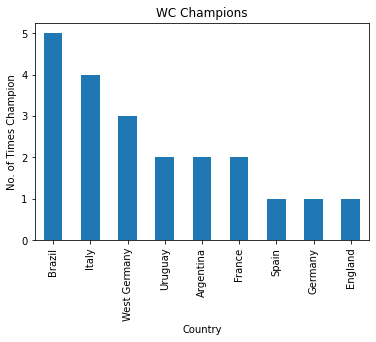

In [9]:
df["Champion"].value_counts().plot(kind="bar")
plt.title("WC Champions")
plt.ylabel("No. of Times Champion")
plt.xlabel("Country")
plt.show()

Brazil is the best team in wc history. 

# 2. Which is the best team in 90's era

In [10]:
df[df['Year']<2000]['Champion'].value_counts()

Brazil          4
Italy           3
West Germany    3
Uruguay         2
Argentina       2
France          1
England         1
Name: Champion, dtype: int64

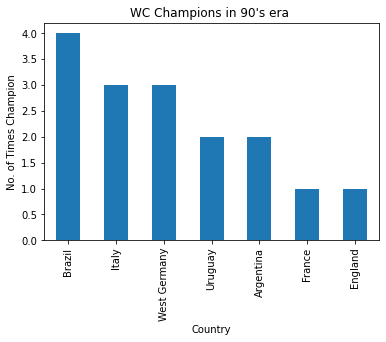

In [12]:
df[df['Year']<2000]['Champion'].value_counts().plot(kind="bar")
plt.title("WC Champions in 90's era ")
plt.ylabel("No. of Times Champion")
plt.xlabel("Country")
plt.show()

Brazil is the best team in 90's era

# 3. Host winning world cup

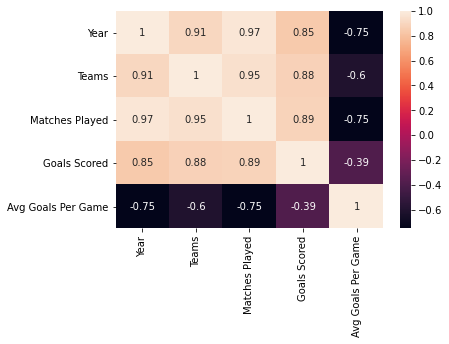

In [14]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

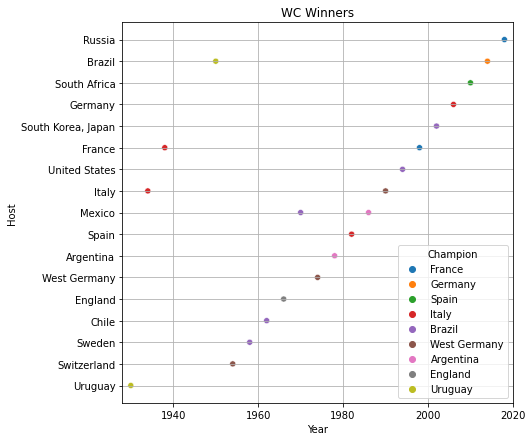

In [15]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="Year",y="Host",hue="Champion")
plt.xlim(1928,2020)
plt.grid()
plt.title("WC Winners")
plt.show()

In [16]:
df[df['Host']==df['Champion']]

,Year,Host,Champion,Runner Up,Third Place,Teams,Matches Played,Goals Scored,Avg Goals Per Game
5,1998,France,France,Brazil,Croatia,32,64,171,2.7
10,1978,Argentina,Argentina,Netherlands,Brazil,16,38,102,2.7
11,1974,West Germany,West Germany,Netherlands,Poland,16,38,97,2.6
13,1966,England,England,West Germany,Portugal,16,32,89,2.8
19,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
20,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6


Only six times host country win the wc.

# 4. Which country host most no. of world cup

In [17]:
df["Host"].value_counts()

Mexico                2
Brazil                2
France                2
Italy                 2
Russia                1
Spain                 1
Switzerland           1
United States         1
Germany               1
Argentina             1
Uruguay               1
Sweden                1
South Korea, Japan    1
Chile                 1
England               1
West Germany          1
South Africa          1
Name: Host, dtype: int64

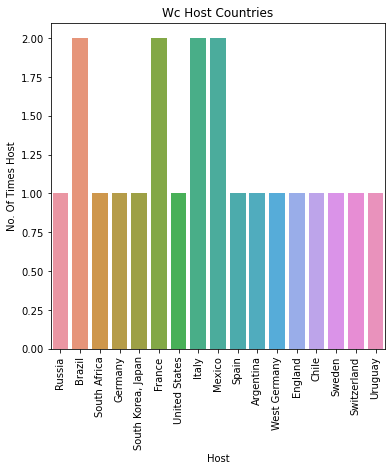

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(data=df,x="Host")
plt.title("Wc Host Countries")
plt.ylabel("No. Of Times Host")
plt.xticks(rotation=90)
plt.show()

Brazil, France, Italy, Mexico host most no. of Wc that is two times.

# 4. No. of goals scored per year and average goals per game per year increasing or not ?

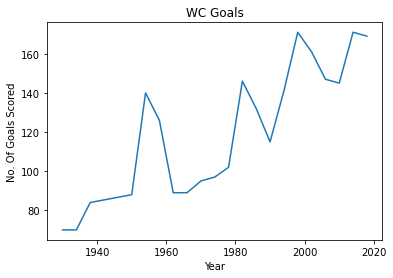

In [25]:
plt.plot(df["Year"],df["Goals Scored"])
plt.title("WC Goals")
plt.xlabel("Year")
plt.ylabel("No. Of Goals Scored")
plt.show()

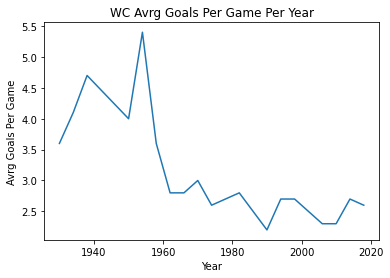

In [28]:
plt.plot(df["Year"],df["Avg Goals Per Game"])
plt.title("WC Avrg Goals Per Game Per Year")
plt.xlabel("Year")
plt.ylabel("Avrg Goals Per Game")
plt.show()
plt.show()

Goals Scored per year is increasing.

# 5. No.of Matches per year 

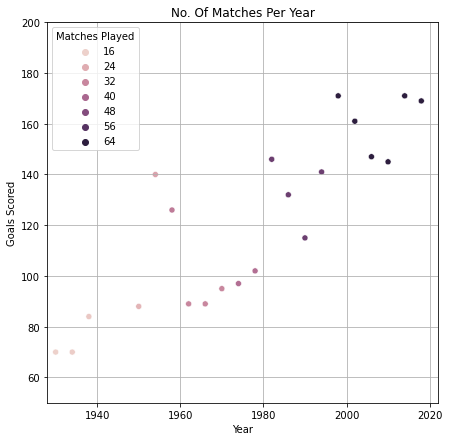

In [29]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x="Year",y="Goals Scored",hue="Matches Played")
plt.title("No. Of Matches Per Year")
plt.ylim(50,200)
plt.xlim(1928,2022)
plt.grid()

no. of matches played per year is increasing.

# 6. Max and min no. of goals scored in which year ?

In [30]:
df["Goals Scored"].max()

171

In [31]:
df[df["Goals Scored"]==171]["Year"]

1    2014
5    1998
Name: Year, dtype: int32

In [32]:
df["Goals Scored"].min()

70

In [33]:
df[df["Goals Scored"]==70]["Year"]

19    1934
20    1930
Name: Year, dtype: int32

max no. of goals scored in 1998 and 2014.
and min no. og goals scored in 1930 and 1934.

# 7. France wins world cup in which years.

In [34]:
df[df['Champion']=='France']['Year']

0    2018
5    1998
Name: Year, dtype: int32

In [35]:
df[(df["Champion"] == "France")]

,Year,Host,Champion,Runner Up,Third Place,Teams,Matches Played,Goals Scored,Avg Goals Per Game
0,2018,Russia,France,Croatia,Belgium,32,64,169,2.6
5,1998,France,France,Brazil,Croatia,32,64,171,2.7


france wins wc in 1938 and 2018. 

# 8. Italy Uruguay and argentina wins world cup in which years

In [39]:
df[(df["Champion"] == "Italy") | (df["Champion"] == "Uruguay") | (df["Champion"] == "Argentina") ]

,Year,Host,Champion,Runner Up,Third Place,Teams,Matches Played,Goals Scored,Avg Goals Per Game
3,2006,Germany,Italy,France,Germany,32,64,147,2.3
8,1986,Mexico,Argentina,West Germany,France,24,52,132,2.5
9,1982,Spain,Italy,West Germany,Poland,24,52,146,2.8
10,1978,Argentina,Argentina,Netherlands,Brazil,16,38,102,2.7
17,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0
18,1938,France,Italy,Hungary,Brazil,15,18,84,4.7
19,1934,Italy,Italy,Czechoslovakia,Germany,16,17,70,4.1
20,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6


Italy wins wc in 1934,1938,1982,2006, Uruguay wins wc in 1930,1950, 
Argentina wins wc in 1978,1986

# 9. Brazil, Italy, Sweden Runner Up in which years?

In [42]:
df[df["Runner Up"].isin(["Brazil","Italy","Sweden"])]

,Year,Host,Champion,Runner Up,Third Place,Teams,Matches Played,Goals Scored,Avg Goals Per Game
5,1998,France,France,Brazil,Croatia,32,64,171,2.7
6,1994,United States,Brazil,Italy,Sweden,24,52,141,2.7
12,1970,Mexico,Brazil,Italy,West Germany,16,32,95,3.0
15,1958,Sweden,Brazil,Sweden,France,16,35,126,3.6
17,1950,Brazil,Uruguay,Brazil,Sweden,13,22,88,4.0


Brazil runner up in 1950,1998, Italy runner up in 1970,1994, Sweden runner up in 1958

# 10. United States finished at third place in which year?

In [43]:
df[df["Third Place"].str.contains("United States")]

,Year,Host,Champion,Runner Up,Third Place,Teams,Matches Played,Goals Scored,Avg Goals Per Game
20,1930,Uruguay,Uruguay,Argentina,United States,13,16,70,3.6


United States finished at third place in 1930.

# 11. who is the inaugural world cup winner.

In [46]:
df[df['Year']==1930]['Champion']

20    Uruguay
Name: Champion, dtype: object

Uruguay is the inaugaral wc winner.

# 12.How many times unique team wins world cup ?

In [47]:
df.Champion.nunique()

9

there are 9 occasions when new team wins wc.

In [15]:
df["Champion"].value_counts()

Brazil          5
Italy           4
West Germany    3
France          2
Uruguay         2
Argentina       2
England         1
Spain           1
Germany         1
Name: Champion, dtype: int64

In [10]:
df["Runner Up"].value_counts()

Netherlands       3
Argentina         3
West Germany      3
Italy             2
Hungary           2
Brazil            2
Czechoslovakia    2
Sweden            1
Croatia           1
France            1
Germany           1
Name: Runner Up, dtype: int64

In [17]:
# Brazil wins world cup 5 times.
# Total appearance in world cup final 7 times.
chances = 5*100/7
chances

71.42857142857143

In [19]:
# Italy wins world cup 4 times.
# Total appearance in world cup final 6 times.
chances1 = 4*100/6
chances1

66.66666666666667

In [20]:
# Only 6 times host wins the cup final.
# Total world cups tornament organized 21 times.
chances2 = 6*100/20
chances2

30.0

# Conclusion

1. Brazil is the best team of all time in world cup.
2. Brazil is the best team in 90's era.
3. Brazil wins world cup 5 times and runner up 2 times.
4. Italy wins world cup 4 times and runner up 2 times.
5. In last 20 years there are unique world cup winners so there is no team particularly dominating.
6. Only 6 times team wins the world cup while hosting the tournament which means that there are more pressure
   on hosts and there are less chances to win world cup while hosting.
7. In world cup history only 9 unique teams wins the world cup.
8. Goals scored per year ratio is increasing.



From above points we colclude that if Brazil or Italy qualifies for world cup final then brazil have 71.42% chance of winning the world cup and Italy have 66.66% chance of winning the world cup.

Hosting country have only 30% chance of winning the world cup.


# Thank You